In [23]:
import matplotlib.pyplot as plt

In [24]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=15)       

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333
4 16233.3333 31533.3333
5 16250.0000 31516.6667
6 16300.0000 29250.0000
7 16500.0000 29933.3333
8 16516.6667 28800.0000


In [25]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [26]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.figure(figsize=(20, 16))
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

In [27]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)

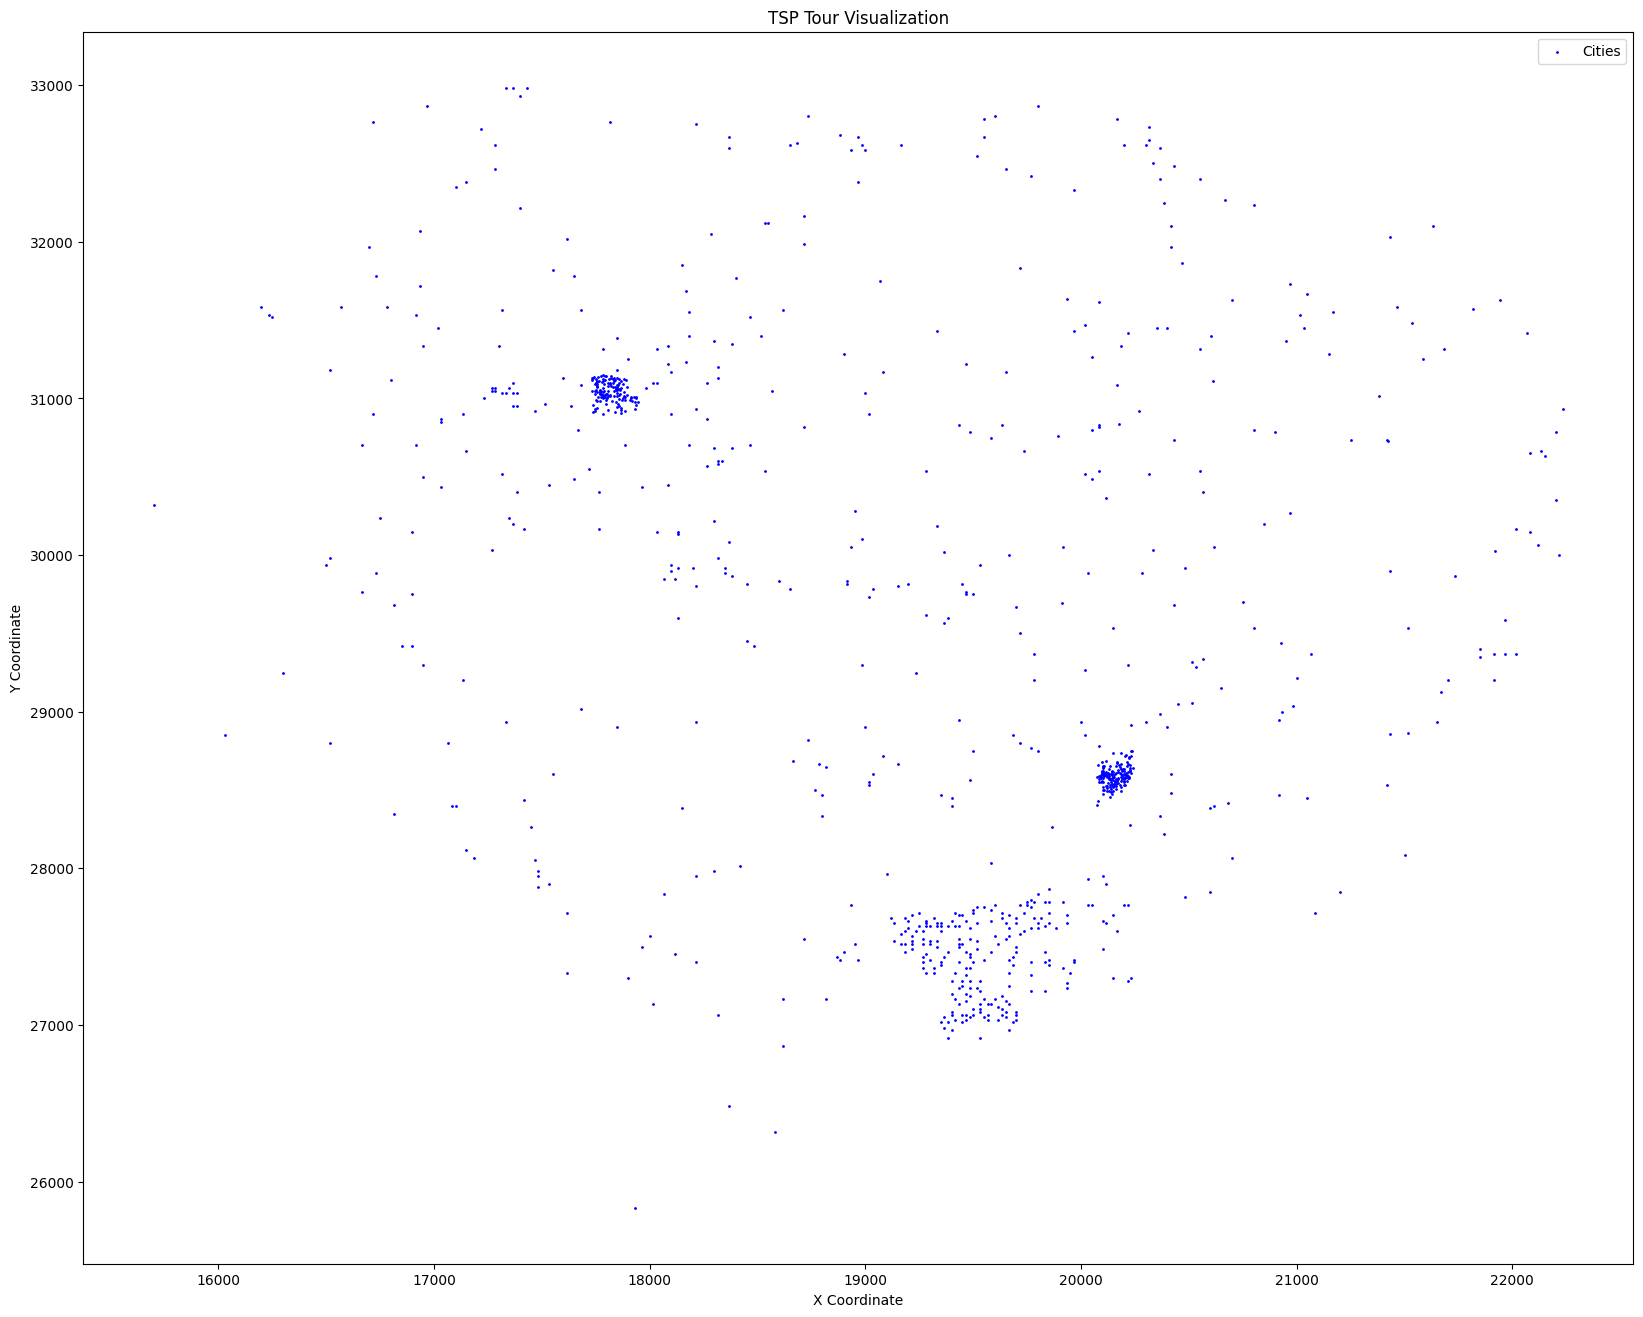

In [28]:
plot_tsp(nodes, show_path=True)

In [29]:
class graph():
    def __init__(self,size,nodes):
        self.size = size
        self.box = [[0]* size for _ in range(size)]
        self.nodes = nodes

    def parrent_nodes(self,u,v,weight):
        self.box[u][v] = weight
        self.box[v][u] = weight

    def make_edges(self):
        self.edges = []
        for i in range(self.size):
            for j in range(i + 1, self.size):  # Only upper triangle
                if self.box[i][j] != 0:
                    self.edges.append((i, j))
    
    def euclidean(self,node1,node2):
        distance = (((node1[0]-node2[0])**2)+((node1[1]-node2[1])**2))**0.5
        return distance

    def K_nearest(self,K=3):
        self.K = K
        for num, node1 in enumerate(self.nodes):
            distances = []

            for idx, node2 in enumerate(self.nodes):
                distance = self.euclidean(node1, node2)
                distances.append((distance, idx))

            # Sort by distance (smallest first)
            distances.sort()

            # Connect to the K nearest neighbors (skip distance to itself at index 0)
            for k in range(1, self.K + 1):
                neighbor_idx = distances[k][1]
                neighbor_dist = distances[k][0]
                self.parrent_nodes(num, neighbor_idx, neighbor_dist)

        self.make_edges()

    def visualize_graph_matplotlib(self):
        plt.figure(figsize=(20, 16))
        # Draw edges
        for edge in  self.edges:
            i, j = edge
            x_values = [self.nodes[i][0], self.nodes[j][0]]
            y_values = [self.nodes[i][1], self.nodes[j][1]]
            plt.plot(x_values, y_values, color='gray', zorder=1)

        # Draw nodes
        x_coords = [node[0] for node in self.nodes]
        y_coords = [node[1] for node in self.nodes]
        plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1,zorder=2,edgecolors='black')

        # Add labels
        for idx, (x, y) in enumerate(self.nodes):
            plt.text(x, y, str(idx), fontsize=9, ha='center', va='center', zorder=3, color='black')

        plt.title("Undirected Graph Visualization")
        #plt.axis('equal')  # Keep aspect ratio square
        plt.grid(True)
        plt.show()

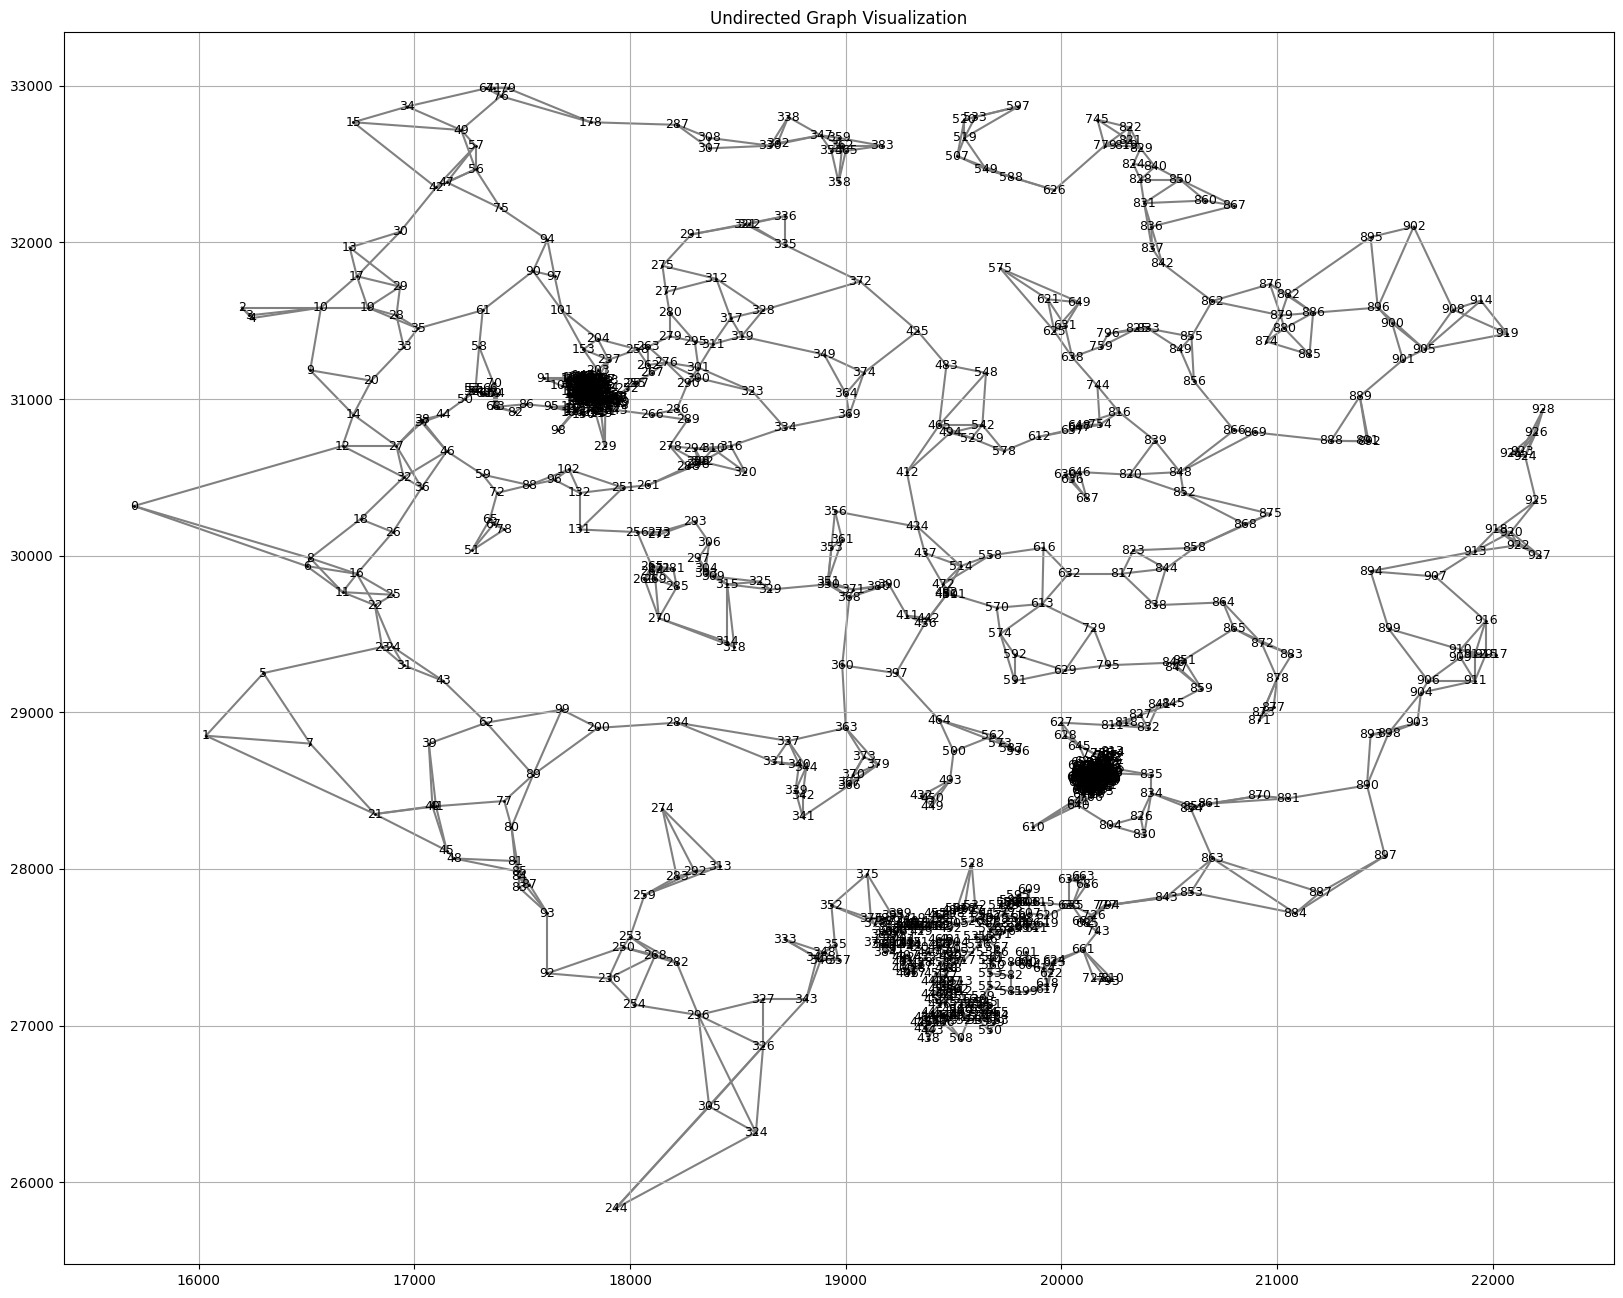

In [30]:
My_Graph = graph(929, nodes)
My_Graph.K_nearest()
My_Graph.visualize_graph_matplotlib()